In [3]:
import anndata as ad
import scanpy as sc
import pandas as pd
import polars as pl
import pandas as pd
import os


from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import torch

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

In [6]:
cp_meta = pd.read_csv("/home/jovyan/share/data/analyses/PLP/data/CP_Meta_well_agg.csv")

In [62]:
dp_etest = pd.read_csv("/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/DeepProfiler/specs5k/etest_res_30_samples_50000_perms.csv")
dp_grit = pd.read_csv("/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/DeepProfiler/specs5k/grit_results.csv")

In [10]:
adata = ad.read("/home/jovyan/share/data/analyses/PLP/DP/extraction/specs3k_deepprofiler_wellagg_adata.h5ad")
adata.obs["row"] = adata.obs["Metadata_Well"].str.slice(0,1)
adata = adata[adata.obs.dropna().index].copy()

In [30]:
adata_nonorm = ad.read("/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/specs3k_deepprofiler_wellagg_NONORM.h5ad")
adata_nonorm.obs["row"] = adata_nonorm.obs["Metadata_Well"].str.slice(0,1)
adata_nonorm = adata_nonorm[adata_nonorm.obs.dropna().index].copy()

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [11]:
adata_site = ad.read("/home/jovyan/share/data/analyses/PLP/DP/extraction/specs3k_deepprofiler_siteagg_adata.h5ad")
adata_site.obs["row"] = adata_site.obs["Metadata_Well"].str.slice(0,1)
adata_site = adata_site[adata_site.obs.dropna().index].copy()

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [13]:
adata2k = ad.read("/home/jovyan/share/data/analyses/PLP/DP/extraction/specs2k_deepprofiler_wellagg_adata.h5ad")
adata2k.obs["row"] = adata2k.obs["Metadata_Well"].str.slice(0,1)
adata2k = adata2k[adata2k.obs.dropna().index].copy()

adata_site2k = ad.read("/home/jovyan/share/data/analyses/PLP/DP/extraction/specs2k_deepprofiler_siteagg_adata.h5ad")
adata_site2k.obs["row"] = adata_site2k.obs["Metadata_Well"].str.slice(0,1)
adata_site2k = adata_site2k[adata_site2k.obs.dropna().index].copy()

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [36]:
adata2k_nonorm = ad.read("/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/specs2k_deepprofiler_wellagg_NONORM.h5ad")
adata2k_nonorm.obs["row"] = adata2k_nonorm.obs["Metadata_Well"].str.slice(0,1)
adata2k_nonorm = adata2k_nonorm[adata2k_nonorm.obs.dropna().index].copy()

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [8]:
grit_plp=pd.read_csv('/home/jovyan/share/data/analyses/PLP/data/specs3k_grit_viability_plp.csv')

In [9]:
grit_plp2k =pd.read_csv('/home/jovyan/share/data/analyses/PLP/data/specs2k_grit_viability_plp.csv')

In [10]:
plp = grit_plp[['batch_id', "Compound_ID", '%Induction','High_PLP_10uM_>80','No_PLP_10uM_<4.53','Low_PLP_10uM_between','nontoxic_10uM_>80','confirmed_in_fix']]
plp["Compound_ID"] = plp["Compound_ID"].str.replace("DMSO", "[dmso]")

/tmp/ipykernel_283521/4013168884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp["Compound_ID"] = plp["Compound_ID"].str.replace("DMSO", "[dmso]")


In [11]:
plp2k = grit_plp2k[['batch_id', "Compound_ID", '%Induction','High_PLP_10uM_>80','No_PLP_10uM_<4.53','Low_PLP_10uM_between','nontoxic_10uM_>80','confirmed_in_fix']]
plp2k["Compound_ID"] = plp2k["Compound_ID"].str.replace("DMSO", "[dmso]")

/tmp/ipykernel_283521/2885597705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp2k["Compound_ID"] = plp2k["Compound_ID"].str.replace("DMSO", "[dmso]")


In [12]:
high_cols = [col for col in plp.columns if "High" in col or "nontoxic" in col]
nont_tox_cols = [col for col in plp.columns if "nontoxic" in col]
low_cols = [col for col in plp.columns if "Low" in col]

# Create the label column based on conditions
plp["label"] = "no_plp"  # Default
plp["label_simple"] = "no_plp"  # Default
plp["label_refined"] = "no_plp" # Default


# If any High columns are 1, set label to 1
plp.loc[plp[high_cols].sum(axis=1) > 0, "label"] = "high_tox_plp"

plp.loc[plp[["High_PLP_10uM_>80"]].sum(axis=1) > 0, "label_refined"] = "high_tox_plp"
plp.loc[plp[["nontoxic_10uM_>80"]].sum(axis=1) > 0, "label_refined"] = "non_tox_plp"

# If any Low columns are 1, set label to 1
plp.loc[plp[low_cols].sum(axis=1) > 0, "label"] = "low_plp"

plp.loc[plp[low_cols].sum(axis=1) > 0, "label_refined"] = "low_plp"

plp.loc[plp[['High_PLP_10uM_>80','Low_PLP_10uM_between','nontoxic_10uM_>80']].sum(axis=1) > 0, "label_simple"] = "plp"  # Default


/tmp/ipykernel_283521/3459613932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp["label"] = "no_plp"  # Default
/tmp/ipykernel_283521/3459613932.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp["label_simple"] = "no_plp"  # Default
/tmp/ipykernel_283521/3459613932.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [13]:
plp2k["label"] = "no_plp"  # Default
plp2k["label_simple"] = "no_plp"  # Default
plp2k["label_refined"] = "no_plp" # Default


# If any High columns are 1, set label to 1
plp2k.loc[plp2k[high_cols].sum(axis=1) > 0, "label"] = "high_tox_plp"

plp2k.loc[plp2k[["High_PLP_10uM_>80"]].sum(axis=1) > 0, "label_refined"] = "high_tox_plp"
plp2k.loc[plp2k[["nontoxic_10uM_>80"]].sum(axis=1) > 0, "label_refined"] = "non_tox_plp"

# If any Low columns are 1, set label to 1
plp2k.loc[plp2k[low_cols].sum(axis=1) > 0, "label"] = "low_plp"

plp2k.loc[plp2k[low_cols].sum(axis=1) > 0, "label_refined"] = "low_plp"

plp2k.loc[plp2k[['High_PLP_10uM_>80','Low_PLP_10uM_between','nontoxic_10uM_>80']].sum(axis=1) > 0, "label_simple"] = "plp"  # Default

/tmp/ipykernel_283521/488869818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp2k["label"] = "no_plp"  # Default
/tmp/ipykernel_283521/488869818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plp2k["label_simple"] = "no_plp"  # Default
/tmp/ipykernel_283521/488869818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [14]:
plp2k = plp2k.groupby("Compound_ID").first().reset_index()

In [15]:
plp = plp.groupby("Compound_ID").first().reset_index()

In [31]:
print(f"Before merge: {adata_nonorm.obs.shape}")
adata_nonorm.obs = adata_nonorm.obs.merge(
    plp, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata_nonorm.obs.shape}")

Before merge: (14349, 6)
After merge: (14349, 17)


In [37]:
print(f"Before merge: {adata2k_nonorm.obs.shape}")
adata2k_nonorm.obs = adata2k_nonorm.obs.merge(
    plp2k, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata2k_nonorm.obs.shape}")

Before merge: (9373, 6)
After merge: (9373, 17)


In [22]:
print(f"Before merge: {adata.obs.shape}")
adata.obs = adata.obs.merge(
    plp, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata.obs.shape}")

Before merge: (15540, 7)
After merge: (15540, 18)


In [23]:
print(f"Before merge: {adata2k.obs.shape}")
adata2k.obs = adata2k.obs.merge(
    plp2k, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata2k.obs.shape}")

Before merge: (9373, 6)
After merge: (9373, 17)


In [24]:
print(f"Before merge: {adata_site.obs.shape}")
adata_site.obs = adata_site.obs.merge(
    plp, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata_site.obs.shape}")

Before merge: (125551, 7)
After merge: (125551, 18)


In [25]:
print(f"Before merge: {adata_site2k.obs.shape}")
adata_site2k.obs = adata_site2k.obs.merge(
    plp2k, 
    left_on="Metadata_batch_id", 
    right_on="Compound_ID", 
    how="left"
)
print(f"After merge: {adata_site2k.obs.shape}")

Before merge: (78063, 7)
After merge: (78063, 18)


In [26]:
adata = adata[~adata.obs.isna().any(axis=1)].copy()
adata_site = adata_site[~adata_site.obs.isna().any(axis=1)].copy()
adata2k = adata2k[~adata2k.obs.isna().any(axis=1)].copy()
adata_site2k = adata_site2k[~adata_site2k.obs.isna().any(axis=1)].copy()


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [43]:
adata_nonorm = adata_nonorm[~adata_nonorm.obs.isna().any(axis=1)].copy()
adata2k_nonorm = adata2k_nonorm[~adata2k_nonorm.obs.isna().any(axis=1)].copy()

adata_nonorm.obs["dataset"] = "specs3k"
adata2k_nonorm.obs["dataset"] = "specs2k"

In [27]:
adata.obs["dataset"] = "specs3k"
adata2k.obs["dataset"] = "specs2k"

In [28]:
adata_site.obs["dataset"] = "specs3k"
adata_site2k.obs["dataset"] = "specs2k"

In [29]:
adata5k = ad.concat([adata, adata2k])

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [44]:
adata5k_nonorm = ad.concat([adata_nonorm, adata2k_nonorm])

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [46]:
adata5k_nonorm.obs[["Metadata_batch_id", "label"]].drop_duplicates().groupby("label").count()

Metadata_batch_id
label                          
high_tox_plp                106
low_plp                     740
no_plp                     3965

In [26]:
adata5k_site = ad.concat([adata_site, adata_site2k])

/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/benchmark_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [27]:
adata.obs[[
    "High_PLP_10uM_>80",
    "No_PLP_10uM_<4.53",
    "Low_PLP_10uM_between",
    "nontoxic_10uM_>80",
    "confirmed_in_fix", "label"]] = adata.obs[[
    "High_PLP_10uM_>80",
    "No_PLP_10uM_<4.53",
    "Low_PLP_10uM_between",
    "nontoxic_10uM_>80",
    "confirmed_in_fix", "label"
]].astype(str)

In [47]:
def run_scanpy(adata):
    sc.pp.pca(adata)
    sc.pp.neighbors(adata, n_neighbors=100)
    sc.tl.umap(adata)

In [29]:
run_scanpy(adata5k_site)

/home/jovyan/share/data/analyses/petter/FeatureExtractionBenchmark/benchmark_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
run_scanpy(adata5k_nonorm)
#run_scanpy(adata)

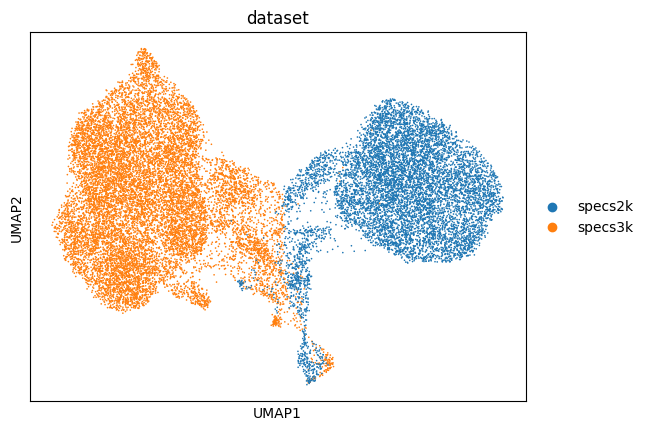

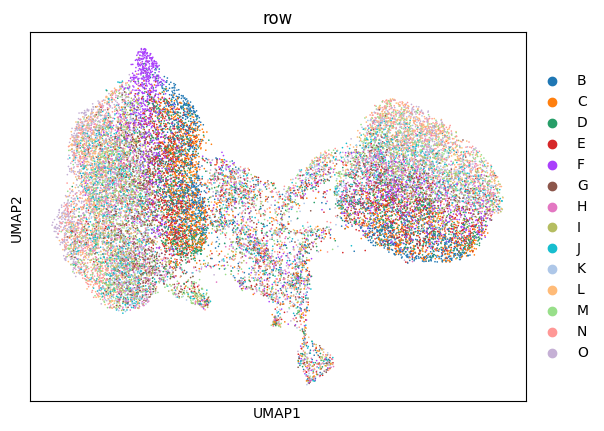

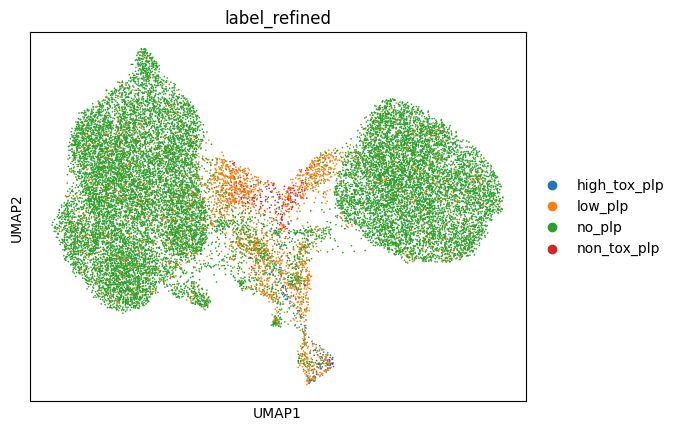

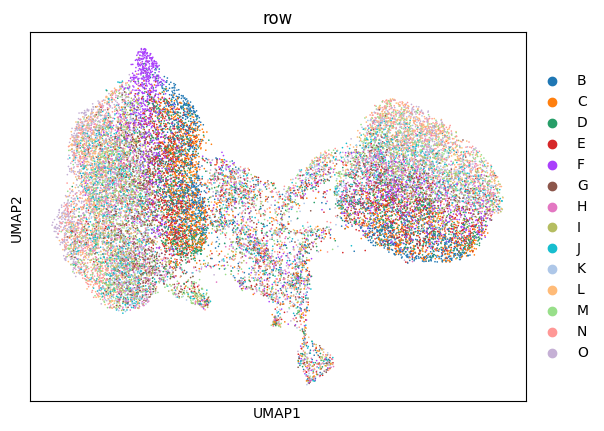

In [49]:
sc.pl.umap(adata5k_nonorm, color='dataset')
sc.pl.umap(adata5k_nonorm, color='row')
sc.pl.umap(adata5k_nonorm, color='label_refined')
sc.pl.umap(adata5k_nonorm, color='row')

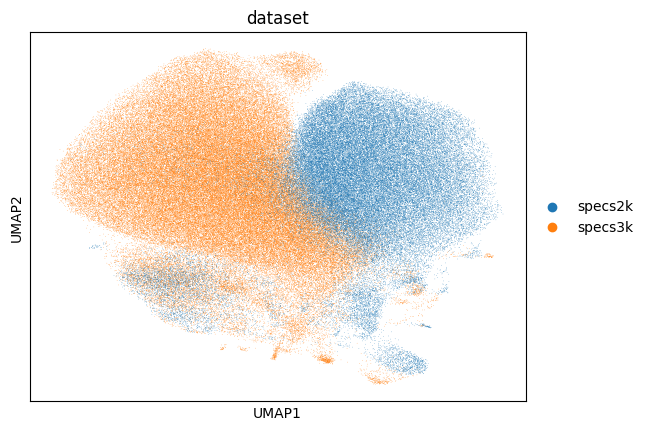

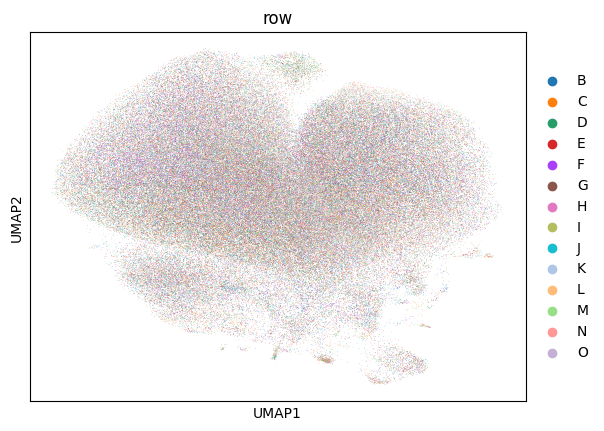

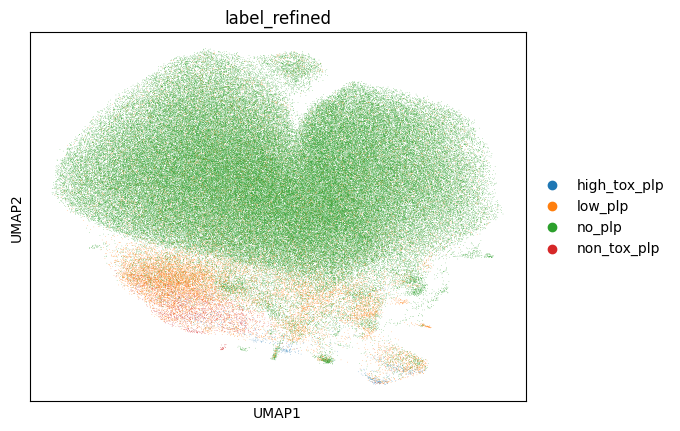

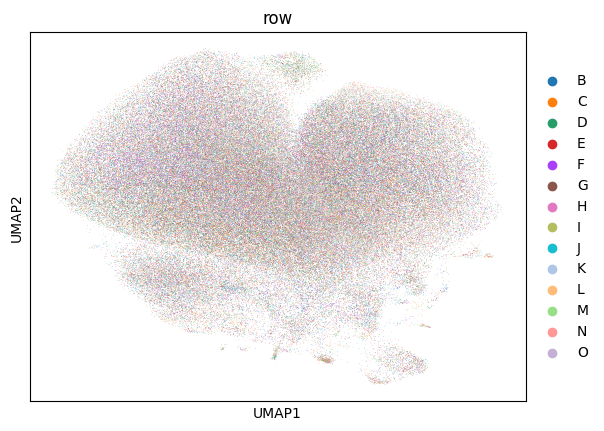

In [47]:
sc.pl.umap(adata5k_site, color='dataset')
sc.pl.umap(adata5k_site, color='row')
sc.pl.umap(adata5k_site, color='label_refined')
sc.pl.umap(adata5k_site, color='row')

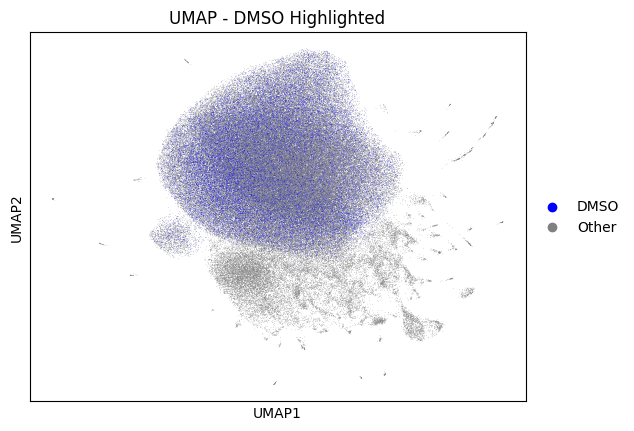

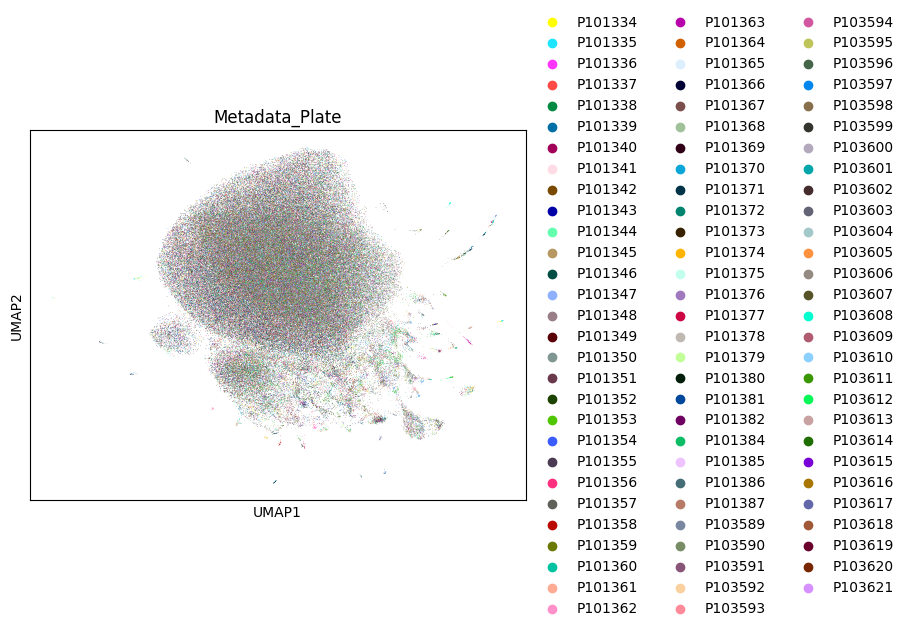

In [44]:
import numpy as np
adata5k_site.obs['batch_highlight'] = np.where(adata5k_site.obs['batch_id'] == 'PHB000001', 'DMSO', 'Other')

# Define custom colors: DMSO (Blue), Other (Gray)
custom_colors = {'DMSO': 'blue', 'Other': 'gray'}

# Plot UMAP with the custom coloring
sc.pl.umap(adata5k_site, color='batch_highlight', palette=custom_colors, title="UMAP - DMSO Highlighted")
sc.pl.umap(adata5k_site, color='Metadata_Plate')

## Run harmony

In [30]:
sc.external.pp.harmony_integrate(adata5k_site, "dataset")

2025-02-14 13:16:50,295 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-02-14 13:19:20,131 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-02-14 13:19:21,330 - harmonypy - INFO - Iteration 1 of 10
2025-02-14 13:23:55,056 - harmonypy - INFO - Iteration 2 of 10
2025-02-14 13:28:01,537 - harmonypy - INFO - Iteration 3 of 10
2025-02-14 13:31:48,043 - harmonypy - INFO - Iteration 4 of 10
2025-02-14 13:35:48,649 - harmonypy - INFO - Iteration 5 of 10
2025-02-14 13:39:09,351 - harmonypy - INFO - Iteration 6 of 10
2025-02-14 13:41:02,733 - harmonypy - INFO - Iteration 7 of 10
2025-02-14 13:42:51,030 - harmonypy - INFO - Iteration 8 of 10
2025-02-14 13:44:30,031 - harmonypy - INFO - Iteration 9 of 10
2025-02-14 13:46:05,345 - harmonypy - INFO - Iteration 10 of 10
2025-02-14 13:47:40,669 - harmonypy - INFO - Stopped before convergence


In [32]:
adata5k.obs["dataset_row"] = adata5k.obs["dataset"] + adata5k.obs["row"]

In [50]:
sc.external.pp.harmony_integrate(adata5k_nonorm, "dataset")

2025-03-18 16:37:17,040 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-18 16:37:35,473 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-18 16:37:35,830 - harmonypy - INFO - Iteration 1 of 10
2025-03-18 16:37:53,536 - harmonypy - INFO - Iteration 2 of 10
2025-03-18 16:38:10,640 - harmonypy - INFO - Converged after 2 iterations


In [54]:
adata5k_nonorm.obsm["X_pca_harmony"].shape

(21662, 50)

In [55]:
sc.pp.neighbors(adata5k_nonorm, n_neighbors=10, n_pcs=50, use_rep= "X_pca_harmony")
sc.tl.umap(adata5k_nonorm)

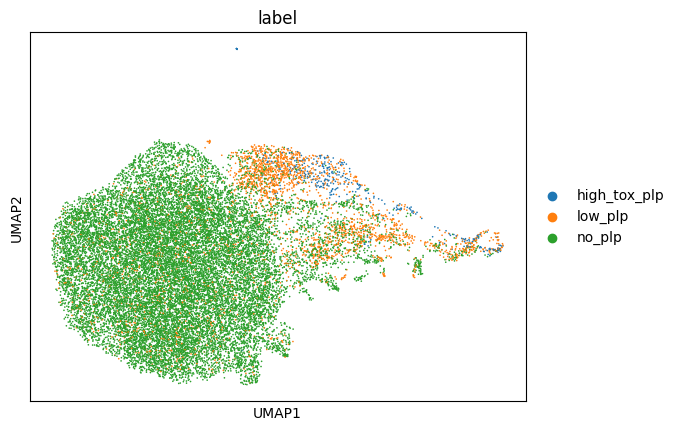

In [57]:
sc.pl.umap(adata5k_nonorm, color ="label")

In [58]:
adata5k_nonorm.write_h5ad("specs5k_deepprofiler_nonorm_harmony.h5ad")

In [39]:
adata5k_site.write_h5ad("specs5k_deepprofiler_siteagg_harmony.h5ad")

## Add grit + etest

In [41]:
adata_5k = ad.read_h5ad("extraction/specs5k_deepprofiler_wellagg_harmony.h5ad")

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [63]:
adata5k_nonorm.obs = adata5k_nonorm.obs.merge(dp_etest, on = "batch_id", how = "left")

In [64]:
adata5k_nonorm.obs = adata5k_nonorm.obs.merge(dp_grit, left_on = "batch_id", right_on= "group", how = "left")

In [65]:
adata5k_nonorm.obs["significant"] = adata5k_nonorm.obs["significant"].astype(str).fillna("no etest")
adata5k_nonorm.obs["label"] = adata5k_nonorm.obs["label"].astype(str)
adata5k_nonorm.obs["label_refined"] = adata5k_nonorm.obs["label_refined"].astype(str)

In [66]:
adata_nonorm_filtered = adata5k_nonorm[adata5k_nonorm.obs["significant"] != "False"].copy()

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [68]:
sc.pp.neighbors(adata_nonorm_filtered, use_rep= "X_pca_harmony")
sc.tl.umap(adata_nonorm_filtered)

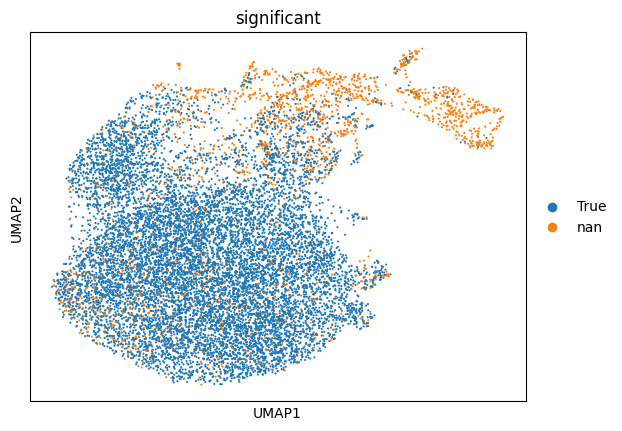

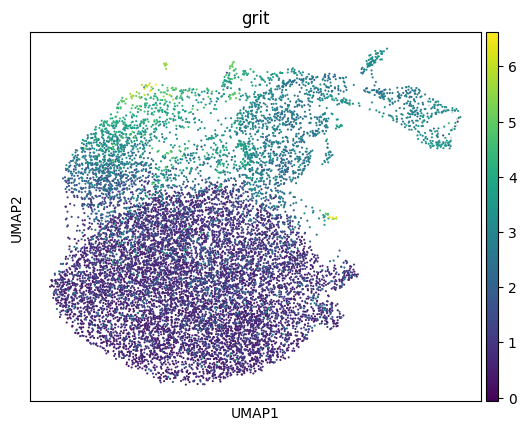

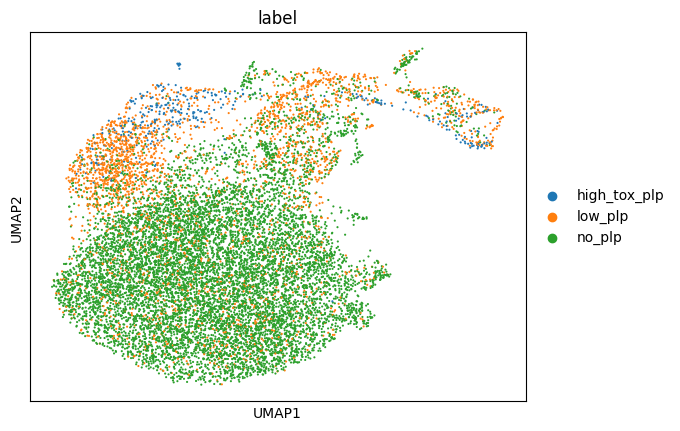

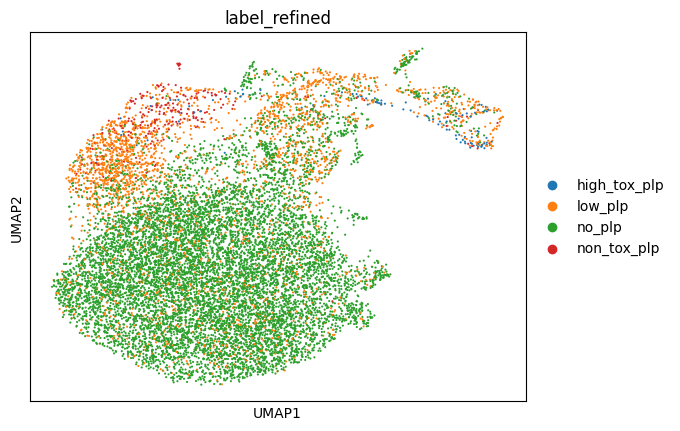

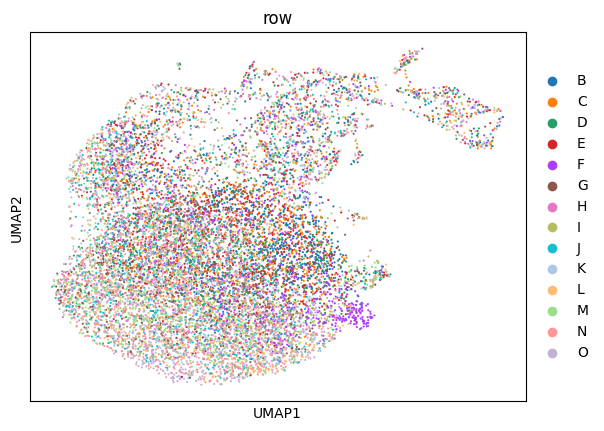

In [69]:
sc.pl.umap(adata_nonorm_filtered, color = "significant")
sc.pl.umap(adata_nonorm_filtered, color = "grit")
sc.pl.umap(adata_nonorm_filtered, color = "label")
sc.pl.umap(adata_nonorm_filtered, color = "label_refined")
sc.pl.umap(adata_nonorm_filtered, color = "row")

In [73]:
adata_nonorm_filtered.obs.drop(columns="significant_adj", inplace=True)


In [74]:
adata_nonorm_filtered.write_h5ad("specs5k_deepprofiler_nonorm_SIGNIFICANT.h5ad")

In [9]:
adata_nonorm_filtered = ad.read_h5ad("/home/jovyan/share/data/analyses/PLP/DP/extraction/specs5k_deepprofiler_nonorm_SIGNIFICANT.h5ad")

In [8]:
adata_filtere_CP = ad.read_h5ad("/home/jovyan/share/data/analyses/PLP/CP/adata_mad_well_filtered_specs5k_CP.h5ad")

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def adata_to_dataframe(adata, label_col, batch_col, obsm_key=None):
    """
    Converts an AnnData object into a DataFrame, adding 'feature_' prefix
    to numeric-only column names and encoding the labels.

    Parameters:
        adata (AnnData): Input AnnData object.
        label_col (str): Label column in adata.obs.
        batch_col (str): Batch column in adata.obs.
        obsm_key (str, optional): Key in adata.obsm for embeddings.

    Returns:
        pd.DataFrame: DataFrame with features, labels, batch_id, and encoded labels.
    """
    obs_df = adata.obs[[label_col, batch_col]].copy()

    if obsm_key:
        feature_matrix = adata.obsm[obsm_key]
        original_feature_names = [str(i) for i in range(feature_matrix.shape[1])]
    else:
        feature_matrix = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
        original_feature_names = adata.var_names

    # Rename numeric-only column names
    feature_names = [
        f"feature_{col}" if str(col).isdigit() else col
        for col in original_feature_names
    ]

    feature_df = pd.DataFrame(feature_matrix, columns=feature_names, index=adata.obs.index)

    # Add encoded labels
    le = LabelEncoder()
    obs_df['encoded_label'] = le.fit_transform(obs_df[label_col])

    df = pd.concat([obs_df, feature_df], axis=1).reset_index(drop=True)

    return df



In [10]:
image_features = adata_to_dataframe(adata_nonorm_filtered, label_col='label', batch_col='batch_id')

In [14]:
image_features_cp = adata_to_dataframe(adata_filtere_CP, label_col='label', batch_col='batch_id')

In [11]:
image_features

label   batch_id  encoded_label  feature_0  feature_1  feature_2  \
0       no_plp  BJ1894380              2   0.551210   3.113015   3.014686   
1       no_plp  BJ1896141              2   0.575669   3.031146   3.121936   
2       no_plp  BJ1896479              2   0.556367   3.096932   3.051328   
3       no_plp  BJ1894017              2   0.556786   3.088073   3.189756   
4       no_plp  BJ1896504              2   0.528029   3.088544   3.081199   
...        ...        ...            ...        ...        ...        ...   
12724   no_plp  BJ1899008              2   0.531143   3.088541   3.344859   
12725  low_plp  BJ1898057              1   0.510793   3.162753   3.139291   
12726   no_plp  BJ1895499              2   0.530656   3.097922   3.212149   
12727   no_plp  BJ1896281              2   0.523693   3.077488   3.173064   
12728   no_plp  BJ1894782              2   0.507254   3.125846   3.218821   

       feature_3  feature_4  feature_5  feature_6  ...  feature_662  \
0       2.219037   0.796679   0.587860   2.824759  ...     0.898227   
1       2.178671   0.785391   0.575125   2.944325  ...     0.936727   
2       2.187833   0.773642   0.550774   3.030454  ...     0.875066   
3       2.202645   0.773371   0.547939   2.957362  ...     0.868504   
4       2.193546   0.778329   0.553287   2.974381  ...     0.865877   
...          ...        ...        ...        ...  ...          ...   
12724   2.189968   0.737146   0.590836   2.847392  ...     0.984076   
12725   2.180890   0.730493   0.530434   2.561058  ...     0.931946   
12726   2.215458   0.757472   0.586255   2.792374  ...     0.923028   
12727   2.214911   0.746517   0.519835   2.827621  ...     0.942715   
12728   2.230673   0.750996   0.566697   2.814962  ...     0.928407   

       feature_663  feature_664  feature_665  feature_666  feature_667  \
0         0.483926     0.183582     0.173023     1.300331     0.352882   
1         0.457712     0.112961     0.188634     1.301945     0.321099   
2         0.519878     0.311266     0.156438     1.263288     0.350614   
3         0.425209     0.148306     0.154800     1.256531     0.275701   
4         0.484172     0.249206     0.156714     1.262006     0.320734   
...            ...          ...          ...          ...          ...   
12724     0.504425     0.170635     0.108494     1.161057     0.329513   
12725     0.555292     0.252554     0.147964     1.321371     0.294703   
12726     0.468907     0.162360     0.136698     1.229414     0.278710   
12727     0.502332     0.103444     0.145998     1.170495     0.268937   
12728     0.432501     0.149870     0.137230     1.216184     0.265942   

       feature_668  feature_669  feature_670  feature_671  
0         2.843724     1.528015     0.115375     0.718038  
1         2.952251     1.656063     0.067685     0.746103  
2         2.913103     1.472360     0.060703     0.582462  
3         2.942042     1.499146     0.041200     0.683934  
4         2.931322     1.422771     0.060544     0.613946  
...            ...          ...          ...          ...  
12724     3.033989     1.525116    -0.006318     0.719676  
12725     2.818619     1.604270     0.052007     0.594984  
12726     3.008195     1.417292     0.033327     0.666256  
12727     2.909806     1.436916     0.061735     0.637991  
12728     3.008157     1.404516     0.033601     0.666629  

[12729 rows x 675 columns]

In [12]:
image_features.to_csv("/home/jovyan/share/data/analyses/PLP/multimodal/data/deepprofiler_NONORM_significant_well.csv")

In [30]:
image_features[["batch_id", "encoded_label"] + [feat for feat in image_features.columns if "feature" in feat]].to_csv("/home/jovyan/share/data/analyses/PLP/multimodal/data/deepprofiler_features_significant_well.csv")

In [31]:
image_features[["batch_id", "encoded_label", "SMILES"]].to_csv("/home/jovyan/share/data/analyses/PLP/multimodal/data/deepprofiler_SMILES_significant_well.csv")

In [9]:
image_features = pd.read_csv("/home/jovyan/share/data/analyses/PLP/multimodal/data/deepprofiler_features_significant_well.csv")

In [10]:
smiles = pd.read_csv("/home/jovyan/share/data/analyses/PLP/Compounds/SMILES_5K_meta.csv")

In [11]:
image_features = image_features.merge(smiles[["Batch nr", "SMILES"]], left_on = "batch_id", right_on = "Batch nr")

In [13]:
chemberta_feats = pd.read_csv("/home/jovyan/share/data/analyses/PLP/Compounds/chemberta_specs5k_features.csv")

In [14]:
merged_data = image_features.reset_index().merge(chemberta_feats, on="SMILES", how='left')

In [16]:
obs_cols = ['index', 'Unnamed: 0_x', 'batch_id', 'encoded_label', 'Batch nr', 'SMILES', 'Unnamed: 0_y']

# Columns for X (all columns except those in obs_cols)
X_cols = [col for col in merged_data.columns if col not in obs_cols]

# Construct AnnData object
merged_adata = ad.AnnData(
    obs=merged_data[obs_cols],
    X=merged_data[X_cols].to_numpy()
)

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
run_scanpy(merged_adata)

In [20]:
merged_adata.write_h5ad("deeprprofiler_chemberta.h5ad")

In [1]:
merged_adata = sc.read_h5ad("deeprprofiler_chemberta.h5ad")

NameError: name 'sc' is not defined

# Split data

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def stratified_split_no_batch_overlap(
    adata, 
    label_col="label", 
    batch_col="batch_id", 
    test_size=0.2, 
    val_size=0.1, 
    random_seed=42, 
    obsm_key=None
):
    """
    Splits an AnnData object into train, validation, and test sets in a stratified way
    over the `label_col`, while ensuring that `batch_id` does not overlap between splits.
    Allows selecting a specific `obsm` key instead of `X` for feature extraction.

    Parameters:
        adata (AnnData): The input AnnData object.
        label_col (str): Column in `adata.obs` used for stratification.
        batch_col (str): Column in `adata.obs` that must not overlap between splits.
        test_size (float): Proportion of data to allocate to the test set.
        val_size (float): Proportion of data to allocate to the validation set **from remaining data**.
        random_seed (int): Random seed for reproducibility.
        obsm_key (str, optional): If provided, use this `obsm` key for feature extraction instead of `X`.

    Returns:
        train_df (pd.DataFrame): Train set as a DataFrame with features and labels.
        val_df (pd.DataFrame): Validation set as a DataFrame with features and labels.
        test_df (pd.DataFrame): Test set as a DataFrame with features and labels.
    """

    np.random.seed(random_seed)

    # Convert AnnData to Pandas DataFrame
    obs_df = adata.obs.copy()

    # Use specified `obsm` key if provided, otherwise use `X`
    if obsm_key is not None:
        if obsm_key not in adata.obsm.keys():
            raise ValueError(f"obsm_key '{obsm_key}' not found in AnnData.obsm. Available keys: {list(adata.obsm.keys())}")
        feature_matrix = adata.obsm[obsm_key]
        feature_names = ["Feature_" + str(col) for col in range(feature_matrix.shape[1])]
    else:
        feature_matrix = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
        feature_names = ["Feature_" + str(col) for col in adata.var.index]

    # Convert features to a DataFrame
    feature_df = pd.DataFrame(feature_matrix, columns=feature_names, index=adata.obs.index)

    # Merge metadata with feature data
    df = pd.concat([obs_df, feature_df], axis=1)

    # Ensure batch_col and label_col exist
    if batch_col not in df.columns:
        raise ValueError(f"Batch column '{batch_col}' not found in AnnData object.")
    if label_col not in df.columns:
        raise ValueError(f"Label column '{label_col}' not found in AnnData object.")

    # Get unique batch-label combinations
    batch_label_groups = df[[batch_col, label_col]].drop_duplicates()

    # Step 1: Split batch-label groups into test and remaining
    train_groups, test_groups = train_test_split(
        batch_label_groups, stratify=batch_label_groups[label_col], test_size=test_size, random_state=random_seed
    )

    # Step 2: Split remaining into train and validation **properly**
    val_groups, train_groups = train_test_split(
        train_groups, stratify=train_groups[label_col], test_size=1 - (val_size / (1 - test_size)), random_state=random_seed
    )

    # Assign data based on batch-label splits
    train_df = df[df[batch_col].isin(train_groups[batch_col])].reset_index(drop=True)
    val_df = df[df[batch_col].isin(val_groups[batch_col])].reset_index(drop=True)
    test_df = df[df[batch_col].isin(test_groups[batch_col])].reset_index(drop=True)

    return train_df, val_df, test_df



In [76]:
train, val, test = stratified_split_no_batch_overlap(adata_nonorm_filtered,label_col="label", random_seed = 42, obsm_key= "X_pca_harmony")

In [77]:
train = pd.concat([train, val], axis = 0)

In [78]:
train_X = train[[feat for feat in train.columns if "Feature" in feat]]

In [79]:
train_y = train["label"]

In [80]:
test_X = test[[feat for feat in test.columns if "Feature" in feat]]

In [82]:
test_y = test["label"]

In [83]:
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.transform(test_y) 

In [84]:
from sklearn.model_selection import GridSearchCV
def grid_search_rf_xgb(train_X, train_y):
    """Performs Grid Search for Random Forest and XGBoost"""
    # Define parameter grids
    rf_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    }

    xgb_params = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }

    # Random Forest Grid Search
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf, rf_params, scoring='f1_weighted', cv=3, n_jobs=-1, verbose=2)
    rf_grid.fit(train_X, train_y)
    best_rf_params = rf_grid.best_params_
    print("Best RF Parameters:", best_rf_params)

    # XGBoost Grid Search
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
    xgb_grid = GridSearchCV(xgb, xgb_params, scoring='f1_weighted', cv=3, n_jobs=-1, verbose=2)
    xgb_grid.fit(train_X, train_y)
    best_xgb_params = xgb_grid.best_params_
    print("Best XGB Parameters:", best_xgb_params)

    return best_rf_params, best_xgb_params

In [85]:
import gc

def print_gpu_memory():
    allocated = torch.cuda.memory_allocated() / (1024**2)
    cached = torch.cuda.memory_reserved() / (1024**2)
    print(f"Allocated: {allocated:.2f} MB")
    print(f"Cached: {cached:.2f} MB")

# Before clearing the cache
print("Before clearing cache:")
print_gpu_memory()

# Clearing cache
gc.collect()
torch.cuda.empty_cache()

# After clearing the cache
print("\nAfter clearing cache:")
print_gpu_memory()

Before clearing cache:
Allocated: 0.00 MB
Cached: 0.00 MB

After clearing cache:
Allocated: 0.00 MB
Cached: 0.00 MB


In [86]:
best_rf_params, best_xgb_params = grid_search_rf_xgb(train_X, train_y_encoded)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   4.6s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.0s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END max_depth=10, min_samples_split=5, n_es

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/

[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   1.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   4.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   7.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.8; total time=   6.7s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   8.2s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.8; total time=   6.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   8.2s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   8.4s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=0.8; total time=   7.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=1.0; total time=   8.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=1.0; total time=   7.1s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=50, subsample=1.0; total time=   7.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  14.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  15.3s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=  14.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  18.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:05:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  16.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=  16.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  26.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  27.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=  29.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   6.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   6.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  32.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  33.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   6.9s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   6.9s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   6.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=  33.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   6.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   6.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   6.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=0.8; total time=   7.4s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1.0; total time=   7.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1.0; total time=   7.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=50, subsample=1.0; total time=   8.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=  11.4s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=  10.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=  11.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=  11.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=  12.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  14.2s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  14.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.7s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   1.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   2.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  13.8s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=  13.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  13.4s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   2.0s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   1.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:06:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=  13.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.3s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   3.3s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   5.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.3s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   5.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   5.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   5.2s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=0.8; total time=   5.4s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=1.0; total time=   5.3s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=1.0; total time=   5.1s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=50, subsample=1.0; total time=   5.5s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.4s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=0.8; total time=   6.8s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.9s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.9s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1.0; total time=   6.7s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   7.6s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   7.8s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.8; total time=   7.6s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   7.9s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   7.7s
[CV] END learning_rate=0.2, max_depth=10, n_estimators=200, subsample=1.0; total time=   7.6s


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:07:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}


In [4]:
best_rf_params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
best_xgb_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

In [87]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tabpfn import TabPFNClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler

# Function for stratified splitting with no batch overlap
def stratified_split_no_batch_overlap(
    adata, 
    label_col="label", 
    batch_col="batch_id", 
    test_size=0.2, 
    val_size=0.1, 
    random_seed=42, 
    obsm_key=None
):
    np.random.seed(random_seed)

    obs_df = adata.obs.copy()

    # Use specified `obsm` key if provided, otherwise use `X`
    if obsm_key is not None:
        if obsm_key not in adata.obsm.keys():
            raise ValueError(f"obsm_key '{obsm_key}' not found in AnnData.obsm. Available keys: {list(adata.obsm.keys())}")
        feature_matrix = adata.obsm[obsm_key]
        feature_names = ["Feature_" + str(col) for col in range(feature_matrix.shape[1])]
    else:
        feature_matrix = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
        feature_names = ["Feature_" + str(col) for col in adata.var.index]

    feature_df = pd.DataFrame(feature_matrix, columns=feature_names, index=adata.obs.index)
    df = pd.concat([obs_df, feature_df], axis=1)

    if batch_col not in df.columns:
        raise ValueError(f"Batch column '{batch_col}' not found in AnnData object.")
    if label_col not in df.columns:
        raise ValueError(f"Label column '{label_col}' not found in AnnData object.")

    batch_label_groups = df[[batch_col, label_col]].drop_duplicates()

    train_groups, test_groups = train_test_split(
        batch_label_groups, stratify=batch_label_groups[label_col], test_size=test_size, random_state=random_seed
    )

    val_groups, train_groups = train_test_split(
        train_groups, stratify=train_groups[label_col], test_size=1 - (val_size / (1 - test_size)), random_state=random_seed
    )

    train_df = df[df[batch_col].isin(train_groups[batch_col])].reset_index(drop=True)
    val_df = df[df[batch_col].isin(val_groups[batch_col])].reset_index(drop=True)
    test_df = df[df[batch_col].isin(test_groups[batch_col])].reset_index(drop=True)

    return train_df, val_df, test_df

# Training and Evaluation
def evaluate_models(adata, obsm_keys=["X", "X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample=False):
    results = []
    predictions = []

    for split_seed in range(5):  # 5 random splits
        for obsm_key in obsm_keys:
            print(f"Evaluating for split seed {split_seed} and features {obsm_key}")

            # Perform stratified split
            train, val, test = stratified_split_no_batch_overlap(
                adata, label_col=label_col, batch_col=batch_col, random_seed=split_seed, obsm_key=obsm_key
            )

            # Combine train and validation sets
            train = pd.concat([train, val], axis=0)

            # Extract features and labels
            train_X = train[[feat for feat in train.columns if "Feature" in feat]]
            train_y = train[label_col]

            test_X = test[[feat for feat in test.columns if "Feature" in feat]]
            test_y = test[label_col]

            # Label encoding
            label_encoder = LabelEncoder()
            train_y_encoded = label_encoder.fit_transform(train_y)
            test_y_encoded = label_encoder.transform(test_y)

            # Optional undersampling
            if undersample:
                class_counts = np.bincount(train_y_encoded)
                min_class_size = max(3 * np.min(class_counts), np.min(class_counts) * 2)
                
                train_balanced_indices = np.hstack([
                    np.random.choice(np.where(train_y_encoded == cls)[0], min(min_class_size, count), replace=False)
                    for cls, count in enumerate(class_counts)
                ])
                
                train_X = train_X.iloc[train_balanced_indices]
                train_y_encoded = train_y_encoded[train_balanced_indices]

            # Define models
            models = {
                'RandomForest': RandomForestClassifier(**best_rf_params, random_state=42),
                'XGBoost': XGBClassifier(**best_xgb_params, random_state=42),
                'TabPFN': TabPFNClassifier(ignore_pretraining_limits=True, random_state=42),
            }

            # Train and evaluate
            for name, model in models.items():
                print(f"Training {name} on {obsm_key}")

                model.fit(train_X, train_y_encoded)

                test_preds = model.predict(test_X)
                test_probs = (
                    model.predict_proba(test_X)[:, 1] if hasattr(model, "predict_proba") and len(label_encoder.classes_) == 2 else None
                )

                test_roc = (
                    roc_auc_score(test_y_encoded, test_probs, multi_class="ovr") if test_probs is not None else None
                )
                test_f1 = f1_score(test_y_encoded, test_preds, average='weighted')
                test_precision = precision_score(test_y_encoded, test_preds, average='weighted')
                test_recall = recall_score(test_y_encoded, test_preds, average='weighted')

                results.append({
                    "Model": name,
                    "Features": obsm_key,
                    "Seed": split_seed,
                    "ROC AUC": test_roc,
                    "Precision": test_precision,
                    "Recall": test_recall,
                    "F1 Score": test_f1,
                })

                # Store predictions
                preds_df = pd.DataFrame({
                    "True Label": test_y,
                    "Predicted Label": label_encoder.inverse_transform(test_preds),
                    "Model": name,
                    "Features": obsm_key,
                    "Seed": split_seed
                })
                predictions.append(preds_df)

    return pd.DataFrame(results), pd.concat(predictions)
    
# Example usage
#results_df, predictions_df = evaluate_models(adata, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = False)
#results_df_under, predictions_df_under = evaluate_models(adata, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = True)

#results_df_filtered, predictions_df_filtered = evaluate_models(adata_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = False)
#results_df_filtered_under, predictions_df_filtered_under = evaluate_models(adata_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = True)

results_df_filtered_simple, predictions_df_filtered_simple = evaluate_models(adata_nonorm_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = False)
results_df_filtered_under_simple, predictions_df_filtered_under_simple = evaluate_models(adata_nonorm_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = True)


Evaluating for split seed 0 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10170 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 0 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10170 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 1 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10168 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 1 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10168 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 2 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10175 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 2 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10175 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 3 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10167 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 3 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10167 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 4 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10192 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 4 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony


/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/tabpfn/classifier.py:416: UserWarning: Number of samples 10192 is greater than the maximum Number of samples 10000 supported by the model. You may see degraded performance.
  X, y, feature_names_in, n_features_in = validate_Xy_fit(


Evaluating for split seed 0 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca
Evaluating for split seed 0 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony
Evaluating for split seed 1 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca
Evaluating for split seed 1 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony
Evaluating for split seed 2 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca
Evaluating for split seed 2 and features X_pca_harmony
Training RandomForest on X_pca_harmony
Training XGBoost on X_pca_harmony
Training TabPFN on X_pca_harmony
Evaluating for split seed 3 and features X_pca
Training RandomForest on X_pca
Training XGBoost on X_pca
Training TabPFN on X_pca
E

In [90]:
def plot_comparison(results_dfs, filtering_levels):
    """
    Plots model performance across different feature sets and filtering levels.

    Parameters:
        results_dfs (list of pd.DataFrame): List of results DataFrames to compare.
        filtering_levels (list of str): Labels for each filtering level.
    """

    # Ensure proper filtering labels
    if len(results_dfs) == 1:
        results_dfs[0]["Filtering"] = filtering_levels[0]
        combined_df = results_dfs[0]
    else:
        combined_df = pd.concat([
            df.assign(Filtering=filtering_levels[i]) for i, df in enumerate(results_dfs)
        ])

    metrics = ["F1 Score", "Accuracy"]
    titles = ["F1 Score", "Accuracy"]

    # Define feature color map
    feature_palette = {
        "Full Features": "C0",
        "X_pca": "C1",
        "X_pca_harmony": "C2"
    }

    # Create figure with subplots per filtering level
    g = sns.catplot(
        data=combined_df,
        x="Model",
        y="F1 Score",
        hue="Features",
        col="Filtering",  # Separate plots for filtering levels
        kind="bar",
        palette=feature_palette,
        height=5, aspect=1.2,
        dodge=True  # Keep feature sets separate
    )

    g.set_axis_labels("Model", "Weighted F1 Score")
    g.set_titles("{col_name}")  # Use filtering level as title
    g.set(ylim=(combined_df["F1 Score"].min() * 0.98, min(1.0, combined_df["F1 Score"].max() * 1.02)))

    # Move legend outside
    plt.legend(title="Features", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Repeat for Accuracy
    k = sns.catplot(
        data=combined_df,
        x="Model",
        y="Recall",
        hue="Features",
        col="Filtering",
        kind="bar",
        palette=feature_palette,
        height=5, aspect=1.2,
        dodge=True
    )

    k.set_axis_labels("Model", "Recall")
    k.set_titles("{col_name}")
    k.set(ylim=(combined_df["Recall"].min() * 0.98, min(1.0, combined_df["Recall"].max() * 1.02)))

    plt.legend(title="Features", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    t = sns.catplot(
        data=combined_df,
        x="Model",
        y="Precision",
        hue="Features",
        col="Filtering",
        kind="bar",
        palette=feature_palette,
        height=5, aspect=1.2,
        dodge=True
    )

    t.set_axis_labels("Model", "Precision")
    t.set_titles("{col_name}")
    t.set(ylim=(combined_df["Precision"].min() * 0.98, min(1.0, combined_df["Precision"].max() * 1.02)))

    plt.legend(title="Features", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



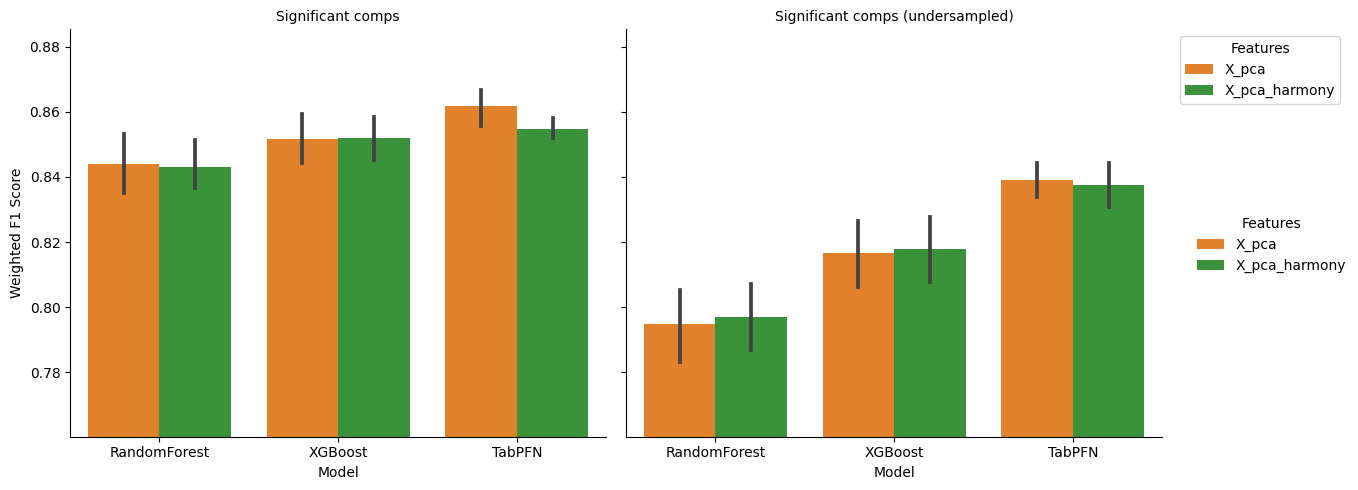

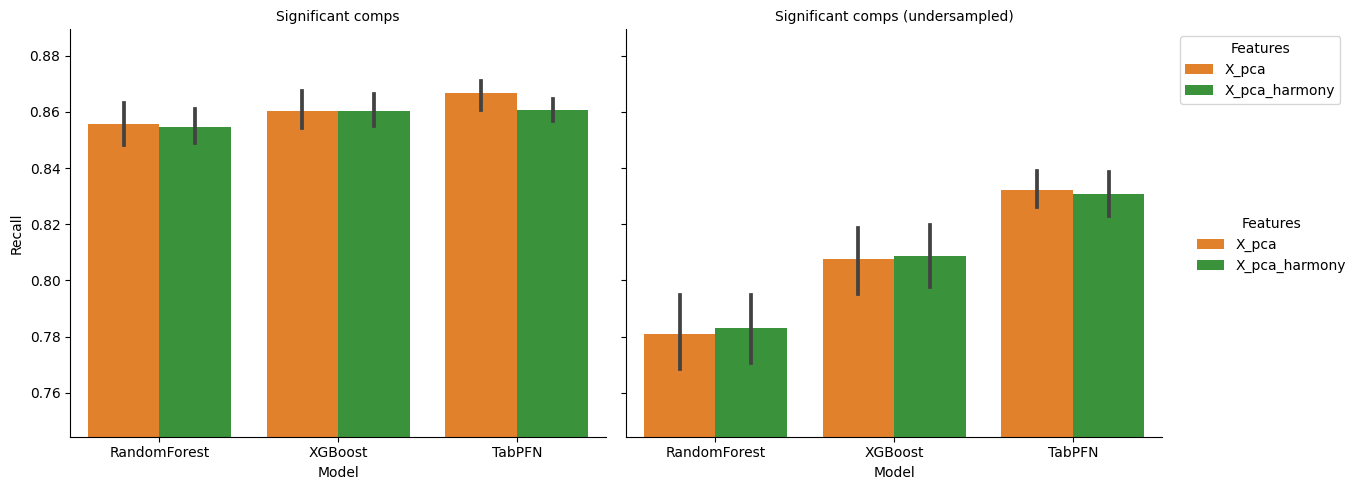

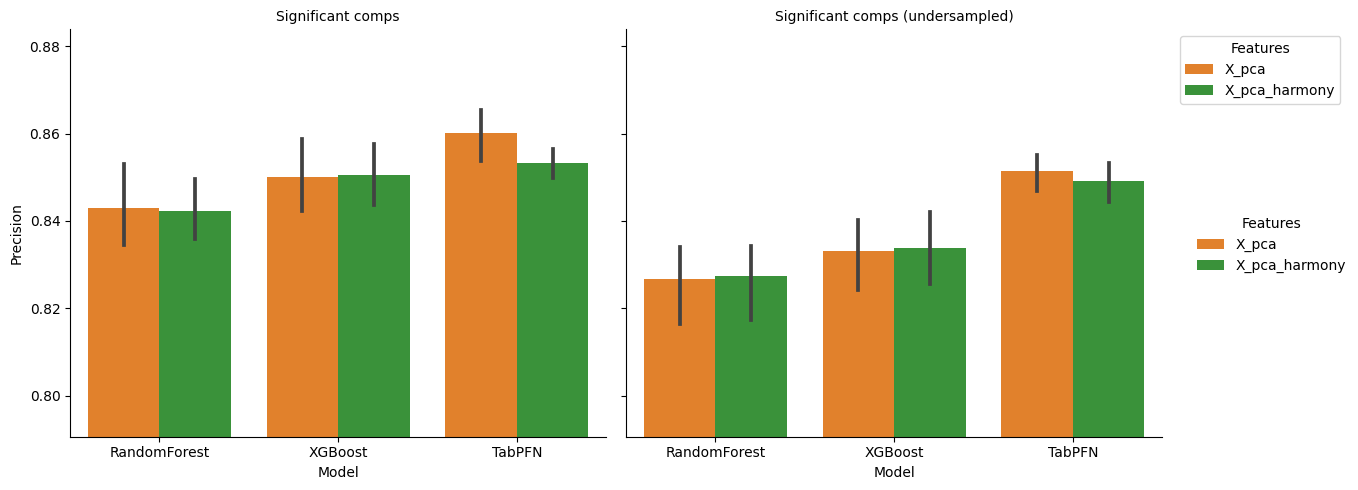

In [91]:
plot_comparison([results_df_filtered_simple, results_df_filtered_under_simple],  ["Significant comps", "Significant comps (undersampled)"])

In [ ]:
results_df_filtered, predictions_df_filtered = evaluate_models(adata_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = False)
results_df_filtered_under, predictions_df_filtered_under = evaluate_models(adata_filtered, obsm_keys=["X_pca", "X_pca_harmony"], label_col="label", batch_col="batch_id", undersample = True)

In [9]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrices(predictions):
    """
    Plots confusion matrices averaged over different seeds and reports values as percentages
    with standard deviation annotated as ± in each cell.
    
    Parameters:
        predictions (pd.DataFrame): A DataFrame containing:
            - 'True Label': Actual labels
            - 'Predicted Label': Predicted labels
            - 'Model': Model name
            - 'Features': Feature type used
            - 'Seed': The random seed used in training
    """

    unique_models = predictions["Model"].unique()
    unique_features = predictions["Features"].unique()
    
    for model in unique_models:
        for feature in unique_features:
            subset = predictions[(predictions["Model"] == model) & (predictions["Features"] == feature)]
            if subset.empty:
                continue

            # Get unique labels
            labels = np.unique(np.concatenate([subset["True Label"], subset["Predicted Label"]]))

            # Create confusion matrices for each seed
            seed_matrices = []
            for seed in subset["Seed"].unique():
                seed_subset = subset[subset["Seed"] == seed]
                cm = confusion_matrix(seed_subset["True Label"], seed_subset["Predicted Label"], labels=labels)
                seed_matrices.append(cm)

            # Compute mean and standard deviation confusion matrix across seeds
            mean_cm = np.mean(seed_matrices, axis=0)
            std_cm = np.std(seed_matrices, axis=0)

            # Convert to percentage
            mean_cm_percent = mean_cm / mean_cm.sum(axis=1, keepdims=True) * 100  # Normalize by row sum
            std_cm_percent = std_cm / mean_cm.sum(axis=1, keepdims=True) * 100  # Normalize std by row sum

            # Create formatted annotations with mean ± std
            annotations = np.array([
                [f"{mean_cm_percent[i, j]:.1f}±{std_cm_percent[i, j]:.1f}" for j in range(mean_cm.shape[1])]
                for i in range(mean_cm.shape[0])
            ])

            # Plot confusion matrix with percentages and standard deviation
            plt.figure(figsize=(6, 5))
            ax = sns.heatmap(
                mean_cm_percent, annot=annotations, fmt="", cmap="Blues",
                xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor="gray"
            )

            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title(f"Confusion Matrix (Mean % ± SD)\n{model} ({feature})")

            plt.show()

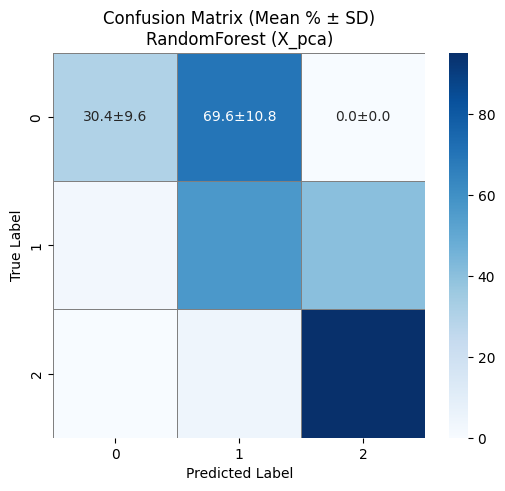

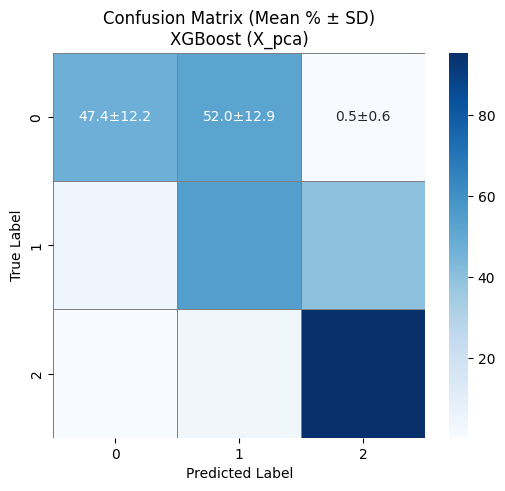

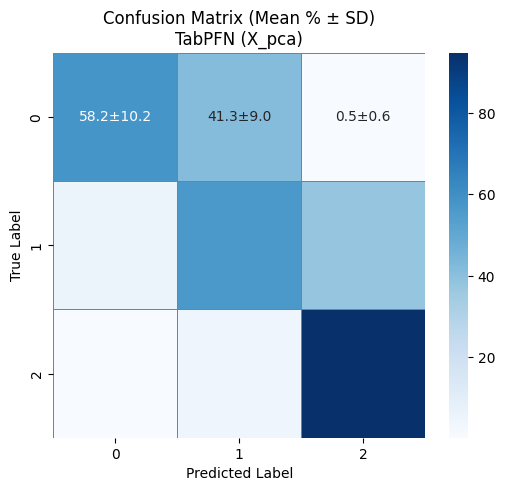

In [10]:
plot_confusion_matrices(predictions_df_filtered_simple)


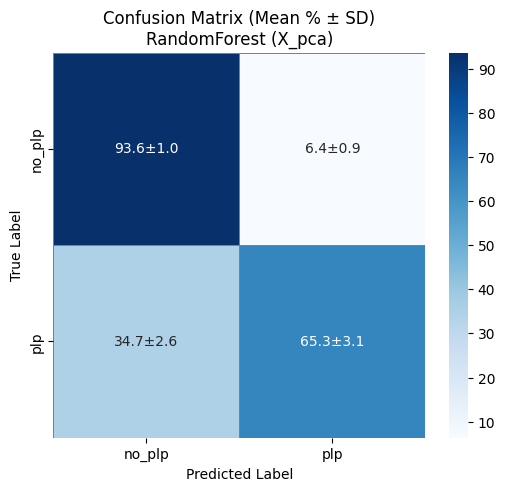

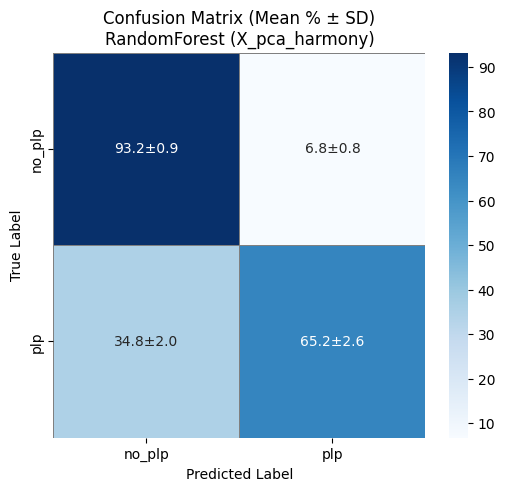

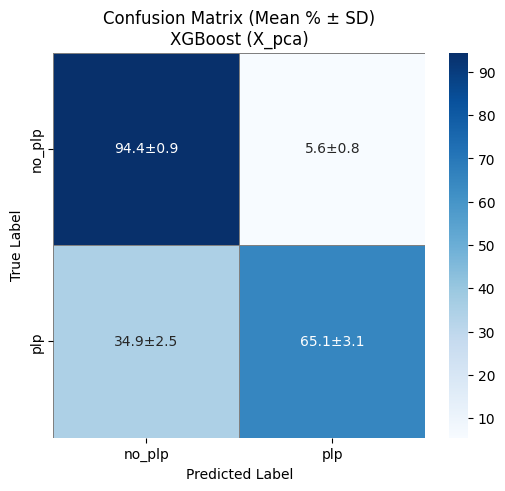

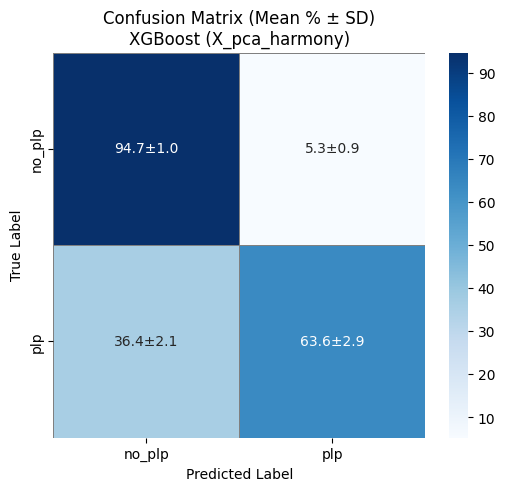

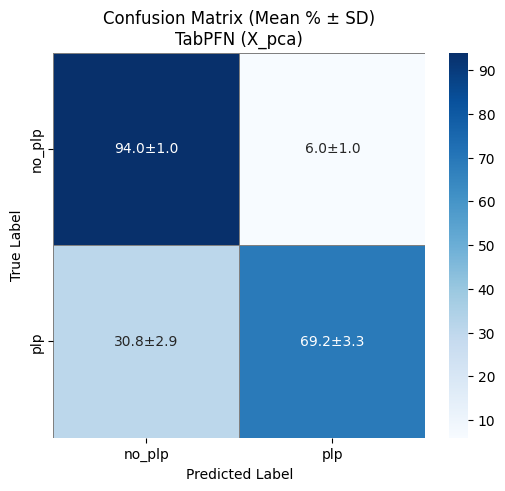

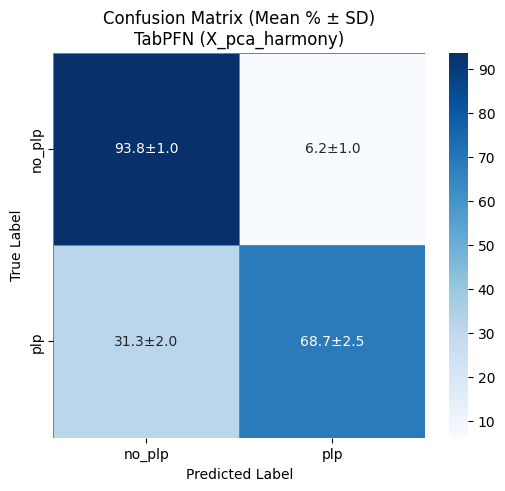

In [64]:
plot_confusion_matrices(predictions_df_filtered_under_simple)


In [2]:
test = ad.read_h5ad("/home/jovyan/share/data/analyses/PLP/DP/specs5k_deepprofiler_siteagg_harmony.h5ad")

/home/jovyan/share/data/analyses/PLP/molt5/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
test

AnnData object with n_obs × n_vars = 188628 × 672
    obs: 'Metadata_Plate', 'Metadata_Well', 'Metadata_Site', 'Metadata_cmpdName', 'Metadata_cmpdConc', 'Metadata_batch_id', 'row', 'Compound_ID', 'batch_id', '%Induction', 'High_PLP_10uM_>80', 'No_PLP_10uM_<4.53', 'Low_PLP_10uM_between', 'nontoxic_10uM_>80', 'confirmed_in_fix', 'label', 'label_simple', 'label_refined', 'dataset'
    uns: 'dataset_colors', 'label_colors', 'label_simple_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'